In [138]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# SVD decomposition and dimension reduction

In [139]:
# X = pd.read_csv('data_dimension_reduction/bars.csv', header=None).values
# X_noise_20 = pd.read_csv('data_dimension_reduction/bars_noise20.csv', header=None).values
# X_noise_50 = pd.read_csv('data_dimension_reduction/bars_noise50.csv', header=None).values

X = pd.read_csv('https://homel.vsb.cz/~svo0175/bars.csv', header=None).values
X_noise_20 = pd.read_csv('https://homel.vsb.cz/~svo0175/bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('https://homel.vsb.cz/~svo0175/bars_noise50.csv', header=None).values

In [140]:
X.shape

(10000, 64)

In [141]:
X[1]

array([  0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0])

In [142]:
X_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5])

In [143]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

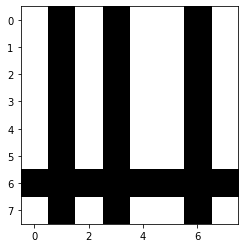

In [144]:
show_image(X[2])

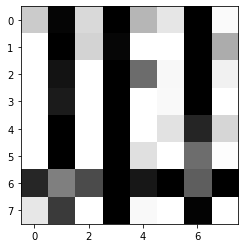

In [145]:
show_image(X_noise_20[2])

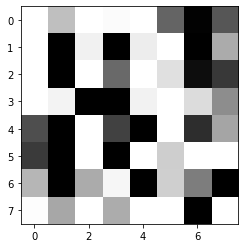

In [146]:
show_image(X_noise_50[2])

## SVD decompostioton

In [147]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U.shape, s.shape, V_T.shape

((10000, 10000), (64,), (64, 64))

In [148]:
s

array([85163.72992057, 25918.78802989, 25885.20650461, 25866.61111402,
       25603.09250067, 25527.33634786, 25461.90923658, 25400.16904854,
       25323.96794768, 25273.05247869, 25090.65260469, 24985.09443308,
       24828.21166745, 24725.47151278, 24599.19377668,  4800.23207891,
        4759.42568525,  4752.02282845,  4714.65694697,  4693.37727937,
        4671.65765993,  4664.8800508 ,  4649.71482489,  4645.60988442,
        4627.47548092,  4613.28613569,  4608.32596123,  4601.90708787,
        4598.48440201,  4592.10180099,  4566.68918604,  4564.57307661,
        4539.47946295,  4528.18799301,  4515.34355164,  4503.88836915,
        4496.2987919 ,  4490.36008691,  4475.56266412,  4466.33868976,
        4461.80509601,  4454.28225144,  4444.18087738,  4433.82306676,
        4426.93951122,  4412.70949494,  4410.35912898,  4407.39023681,
        4392.68325091,  4367.7956838 ,  4356.32995984,  4352.68991712,
        4343.81015817,  4333.71349581,  4328.56992482,  4316.97332939,
      

What does the values in vector **s** represent?

### Reconstruct complete matrix and check error

In [149]:
np.diag(s)

array([[85163.72992057,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 25918.78802989,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 25885.20650461, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         4218.36279764,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4216.42652516,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,  4141.90618514]])

In [150]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
X-R

array([[ 1.65257668e-13,  1.20311482e-11,  1.15799487e-11, ...,
         1.47792889e-12,  1.47792889e-12,  3.69482223e-13],
       [-7.40624844e-14, -2.10723624e-13, -1.59161573e-11, ...,
         8.94178064e-12, -7.91066400e-12, -3.30888563e-12],
       [-2.22021241e-13, -1.70530257e-13, -8.37529664e-13, ...,
         2.71185423e-12,  3.75166564e-12,  8.55501035e-12],
       ...,
       [-4.76237440e-13, -4.83169060e-13, -7.67386155e-13, ...,
        -2.65118897e-14, -4.38979261e-13, -5.45533072e-13],
       [-4.26325641e-13,  3.36084919e-14,  8.45554374e-13, ...,
        -2.82670662e-13,  7.63552671e-14,  5.68434189e-13],
       [ 1.18165564e-13,  2.92590617e-14,  7.76118200e-14, ...,
         3.97903932e-13,  1.70530257e-13,  4.26325641e-13]])

### Use only 5 main vectors (which represent reduction to 5 dimensions). Create reconstructed matrix and compare it with original one.
- https://csiu.github.io/blog//img/figure/2017-04-16/svd.png


In [151]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

In [152]:
V_T[:5, :]

array([[-0.12576034, -0.12583471, -0.12446459, -0.12522232, -0.12453633,
        -0.12479076, -0.12320246, -0.12501406, -0.12368075, -0.12438685,
        -0.12219952, -0.12274359, -0.1239547 , -0.12395804, -0.12242578,
        -0.12374513, -0.12579543, -0.12611035, -0.12475121, -0.12483118,
        -0.1258248 , -0.125511  , -0.1238515 , -0.12529944, -0.1255637 ,
        -0.12730238, -0.12488608, -0.12613748, -0.12474634, -0.12421956,
        -0.12321001, -0.12535877, -0.12649177, -0.12752608, -0.1254781 ,
        -0.12578643, -0.12522948, -0.12697614, -0.12493317, -0.12562678,
        -0.12440544, -0.12568559, -0.1242691 , -0.12305136, -0.12453197,
        -0.12403298, -0.12287156, -0.12450303, -0.12667953, -0.12667078,
        -0.12424151, -0.1246307 , -0.12455422, -0.1243726 , -0.12256402,
        -0.12524289, -0.12736486, -0.12835399, -0.12557424, -0.1263055 ,
        -0.12606162, -0.12555467, -0.12399751, -0.12668234],
       [-0.14879275, -0.3026219 , -0.14459322, -0.15534514, -0.

## Where can we find vector space in reduced dimension?

In [153]:
U[:, :5].shape

(10000, 5)

In [154]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

## Reconstruction from reduced space and error calculation

In [155]:
R = U[:,:32].dot(np.diag(s[:32])).dot(V_T[:32, :])
R.shape

(10000, 64)

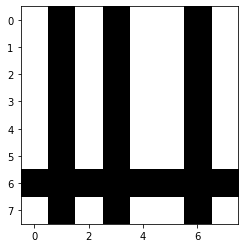

In [156]:
show_image(X[2])

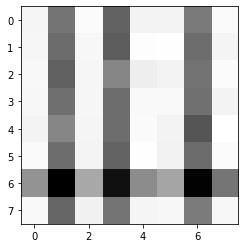

In [157]:
show_image(R[2])

In [158]:
print(X[2]-R[2])

[ -15.3775224    25.72470995    3.41601512    0.337928    -23.12963077
  -22.81417223   34.11022853   -0.91678229  -13.90312073   13.19632995
  -11.79843444   -7.25921232    8.54898584   13.43039312   14.60346516
  -18.62654802   -5.17348902   -1.58078796  -12.82625991   51.03147743
  -37.76561426  -22.80345976   24.63924688    4.49644873   -8.8964454
   18.03829452  -14.2470803    15.15426237   -2.65114104   -2.72715165
   19.24694334  -22.57867694  -22.39960168   50.44207048  -16.6885053
   15.24395415    0.42952965  -21.99949246  -21.04618268   15.56557189
   -1.10654233   14.43175045  -18.66706635    1.74296641   11.9469879
  -27.22329724   13.30245784    4.12499318   69.16937075 -124.43623124
   97.36748084 -102.6791709    59.66648741   92.55577532 -120.56199242
   28.02148657   -3.17300007    5.9610399   -27.71867791   26.75654777
  -17.2379678    -8.71768891   35.84359808  -10.13435223]


In [159]:
print(X-R)

[[-14.2279642  -26.68762117  27.90682246 ... -63.42841254  -5.52720278
    8.61990299]
 [ 11.22645731  21.00203401  -0.72591336 ... -16.4213566  -18.03102606
  -15.37679527]
 [-15.3775224   25.72470995   3.41601512 ...  -8.71768891  35.84359808
  -10.13435223]
 ...
 [-13.92031416  29.80531808  30.84763518 ...  -5.16332183 -30.57494064
  -22.69082619]
 [ 51.6432111  -30.53449275 -14.56917    ...   8.9519586   -2.27769532
   15.46035946]
 [ -0.84773899  -4.88797049 -10.87859635 ...  27.36631295 -97.09905935
  -17.14162839]]


In [160]:
np.linalg.norm(X-R)

24790.511503550744

# Individual tasks

**Objective of first task is to leverage noise reduction when working with reduced dimension space.**

**Second task should demonstare usage of dimension reductions techniques for 2D visualization and showing clustering results in that vis.**

---

## Task 1(1p) : Complete following tasks for dimension reduction using SVD over our toy datasets (bars, bars_noise20, bars_noise50)

### Qustion: What does the number from previous cell mean? What is the output from *np.linalg.norm* function?

Answer: 

### Find good number of features/dimension for our toy datasets
- Our datasets **X_noise_20** and **X_noise_50** contain noise, we want to use dimension reduction to eliminate impact of noise in our dataset
- **Try different number of dimensions for dimension reduction, calculate Frobenius norm for reconstructed and original matrix, create plot with results afterwards.**
- Repeat proces for datasets **X**, **X_noise_20**, **X_noise_50**


In [161]:
def process_ds(ds, dim):
    U, s, V_T = np.linalg.svd(ds, full_matrices=True)
    R = U[:, :dim].dot(np.diag(s[:dim])).dot(V_T[:dim])
    print(f'frobenius norm for original dataset = {np.linalg.norm(ds)}')
    print(f'frobenius norm for reconstructed ds = {np.linalg.norm(R)}')
    show_image(R[2])
    return R

frobenius norm for original dataset = 131202.39422358116
frobenius norm for reconstructed ds = 122534.3912143934


array([[-7.32602513e+01, -5.46753406e+01, -3.63990721e+01, ...,
         3.70394132e+02,  2.30591659e+02,  2.21231578e+02],
       [-4.67898498e+01, -3.33289437e+01,  1.70223478e+02, ...,
        -5.06665342e+00,  5.70461954e+00,  7.95619408e-01],
       [-4.19723045e+01,  1.85389728e+02, -8.55443731e+00, ...,
         5.92164935e+00,  2.43487673e+02, -1.80170588e+00],
       ...,
       [ 2.59699592e+01,  2.33104630e+02,  2.59170268e+02, ...,
         3.02331672e+01,  3.88597664e+01,  3.03680351e+00],
       [ 1.67321913e+02, -5.18746971e+01, -2.19640713e+01, ...,
        -3.47132868e-01,  2.27602715e+01,  2.17629371e+02],
       [-2.76642540e+01, -2.16392006e+01, -1.25167741e+01, ...,
         2.20863855e+02,  4.19112832e+02,  2.25922221e+02]])

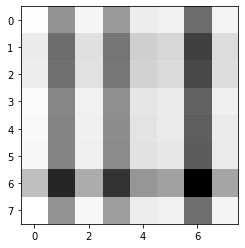

In [162]:
process_ds(X, 13)

frobenius norm for original dataset = 123656.5638937133
frobenius norm for reconstructed ds = 115274.24518989444


array([[-70.66099768, -31.47260903,   1.11142058, ..., 351.52697235,
        222.64919072, 208.14560769],
       [-33.02160428, -26.84540539, 151.54504613, ...,  10.71692561,
         29.76385549,  47.00988746],
       [  4.89221523, 203.99564689,  38.37985971, ...,  14.69914138,
        206.0842313 ,  18.59947658],
       ...,
       [ 47.93578467, 207.96958855, 234.69495182, ...,  63.13490809,
         67.70861605,  20.37682479],
       [140.59112073, -47.92343499, -27.62507773, ...,  40.48535758,
         69.08624203, 201.88201751],
       [-10.00956631,  -2.10947544,   8.98502622, ..., 212.23540574,
        358.36866711, 215.81649445]])

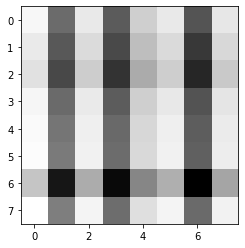

In [163]:
process_ds(X_noise_20, 13)

frobenius norm for original dataset = 123547.18243650884
frobenius norm for reconstructed ds = 109067.66891456595


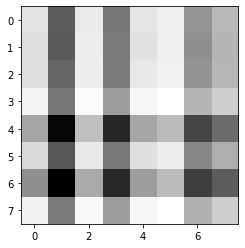

In [164]:
R_50 = process_ds(X_noise_50, 13)

### Interpret results based on previous graphs. What is the best number of dimensions? Why? What kind of information our toy dataset have?

Interpretation:

We can afford to reduce the dataset down to just 13 dimensions. Whilst a bit of noise had been added to the first dataset, The data in the noisiest dataset appears to have been reconstructed very well and the noise reduction seems to have helped clean up the data a lot.

Our dataset contains images created by combining vertical and horizontal lines.
We do not need to know the color of each pixel, we only need to know the position of each horizontal and vertical line (not taking noise into account).
Thus, each picture could be represented using just 16 dimensions, rather than 64. The dimension reduction algorithm probably found a way to represent the data
as a linear combination of (probably overlapping) lines, rather than a combination of pixels.

### Visualize record *X_noise_50\[2\]* in form of 8x8 image from reconstructed matrix produced for best dimension reduction parameter. Did the use of reduced space helped?

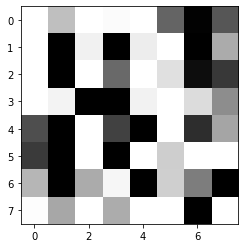

In [165]:
show_image(X_noise_50[2])

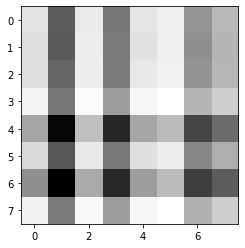

In [166]:
show_image(R_50[2])

## Task 2(1p) : Dimension reduction and visualization of clustering results

We have tried some clustering for **Country data** last week. I have copied the most important cells into this notebook.

1. Fill in any clustering method for our dataset **Country data**, you can use already scaled matrix **X_scaled**.
2. Lets use other dimension reduction techniques: PCA and TSNE from sklearn library and get 2D space representation for our matrix **X_scaled**.
3. Use 2D representation from dimension reduction methods for 2D visualization of **Country data** and use color for displaying clusters found in matrix **X_scaled** - create at least two scatter plots for data points and use cluster_id as point's color.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [167]:
df = pd.read_csv('https://homel.vsb.cz/~svo0175/country-data.csv')
df_only_numeric = df.select_dtypes(np.number).copy()
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df_only_numeric.values)

### Clustering

Use any clustering method for preprocessed data.

Be aware to apply clustering for **X_scaled**, which is n-diminensional data. Do not use clustering only on 2D representation after dimension reduction. 

In [168]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13)
clustering.fit(X_scaled)

KMeans(n_clusters=4, random_state=13)

### 2D vis

In [169]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [170]:
def plot_red(df, reducer):
    red = reducer(2)
    reduced = red.fit_transform(df)
    
    reduced = pd.DataFrame({'x': reduced[:, 0], 'y': reduced[:, 1]})
    reduced['cluster_id'] = clustering.labels_
    
    plt.scatter(x=reduced['x'], y=reduced['y'], c=reduced['cluster_id'])

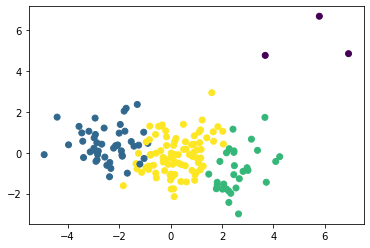

In [171]:
plot_red(X_scaled, PCA)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


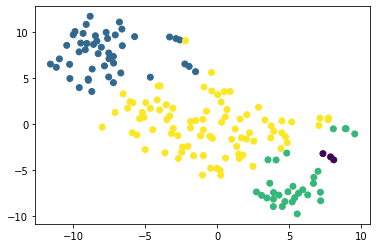

In [172]:
plot_red(X_scaled, TSNE)